In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [47]:
df_original = pd.read_csv('household_power_consumption.csv')
#df_original = pd.read_csv('/kaggle/input/240000-household-electricity-consumption-records/household_power_consumption.csv')
df = df_original.copy()
df.head(9000)

,index,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,0,1/1/07,0:00:00,2.58,0.136,241.97,10.6,0,0,0.0
1,1,1/1/07,0:01:00,2.552,0.1,241.75,10.4,0,0,0.0
2,2,1/1/07,0:02:00,2.55,0.1,241.64,10.4,0,0,0.0
3,3,1/1/07,0:03:00,2.55,0.1,241.71,10.4,0,0,0.0
4,4,1/1/07,0:04:00,2.554,0.1,241.98,10.4,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...
8995,8995,7/1/07,5:55:00,0.25,0.056,244.79,1.2,0,0,0.0
8996,8996,7/1/07,5:56:00,0.25,0.056,244.9,1.2,0,0,0.0
8997,8997,7/1/07,5:57:00,0.252,0.06,245.6,1.2,0,0,0.0
8998,8998,7/1/07,5:58:00,0.254,0.062,246.33,1.2,0,0,0.0


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260640 entries, 0 to 260639
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   index                  260640 non-null  int64  
 1   Date                   260640 non-null  object 
 2   Time                   260640 non-null  object 
 3   Global_active_power    260640 non-null  object 
 4   Global_reactive_power  260640 non-null  object 
 5   Voltage                260640 non-null  object 
 6   Global_intensity       260640 non-null  object 
 7   Sub_metering_1         260640 non-null  object 
 8   Sub_metering_2         260640 non-null  object 
 9   Sub_metering_3         256869 non-null  float64
dtypes: float64(1), int64(1), object(8)
memory usage: 19.9+ MB


In [49]:
def parse_date(date_str, time_str):
    try:
        # First try parsing with two-digit year
        return pd.to_datetime(date_str + ' ' + time_str, format='%d/%m/%y %H:%M:%S')
    except ValueError:
        # If it fails, try parsing with four-digit year
        return pd.to_datetime(date_str + ' ' + time_str, format='%d/%m/%Y %H:%M:%S')

In [50]:
df['Date_time'] = df.apply(lambda row: parse_date(row['Date'], row['Time']), axis=1)
df = df[['Global_active_power', 'Date_time', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']]
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df['Sub_metering_1'] = pd.to_numeric(df['Sub_metering_1'], errors='coerce')
df['Sub_metering_2'] = pd.to_numeric(df['Sub_metering_2'], errors='coerce')
df['Sub_metering_3'] = pd.to_numeric(df['Sub_metering_3'], errors='coerce')

In [51]:
df.head()

,Global_active_power,Date_time,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2.580,2007-01-01 00:00:00,0.0,0.0,0.0
1,2.552,2007-01-01 00:01:00,0.0,0.0,0.0
2,2.550,2007-01-01 00:02:00,0.0,0.0,0.0
3,2.550,2007-01-01 00:03:00,0.0,0.0,0.0
4,2.554,2007-01-01 00:04:00,0.0,0.0,0.0


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260640 entries, 0 to 260639
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Global_active_power  256869 non-null  float64       
 1   Date_time            260640 non-null  datetime64[ns]
 2   Sub_metering_1       256869 non-null  float64       
 3   Sub_metering_2       256869 non-null  float64       
 4   Sub_metering_3       256869 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 9.9 MB


In [53]:
from sklearn.preprocessing import RobustScaler

# Fill na with values forward
print(f'Missing Value found: {df.isna().sum()}')
df = df.fillna(method='ffill')

# Transform data with RobustScaler
rs = RobustScaler()
num_cols = ['Sub_metering_1', 'Sub_metering_2','Sub_metering_3']
df[num_cols] = rs.fit_transform(df[num_cols])

Missing Value found: Global_active_power    3771
Date_time                 0
Sub_metering_1         3771
Sub_metering_2         3771
Sub_metering_3         3771
dtype: int64


In [54]:
df.head()

,Global_active_power,Date_time,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2.580,2007-01-01 00:00:00,0.0,0.0,0.0
1,2.552,2007-01-01 00:01:00,0.0,0.0,0.0
2,2.550,2007-01-01 00:02:00,0.0,0.0,0.0
3,2.550,2007-01-01 00:03:00,0.0,0.0,0.0
4,2.554,2007-01-01 00:04:00,0.0,0.0,0.0


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260640 entries, 0 to 260639
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Global_active_power  260640 non-null  float64       
 1   Date_time            260640 non-null  datetime64[ns]
 2   Sub_metering_1       260640 non-null  float64       
 3   Sub_metering_2       260640 non-null  float64       
 4   Sub_metering_3       260640 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 9.9 MB


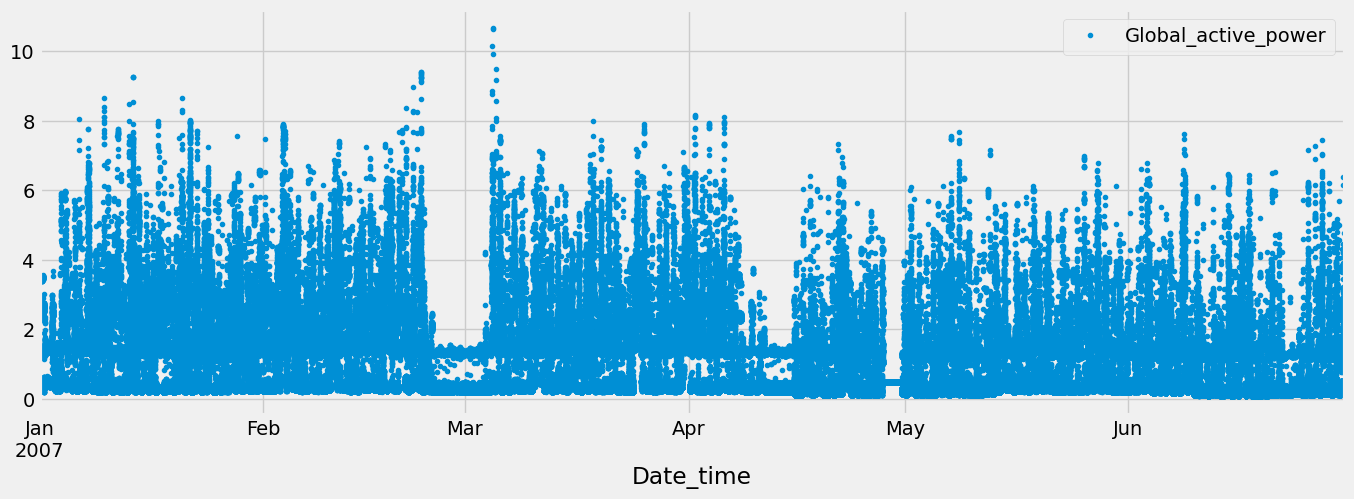

In [56]:
df.plot(x='Date_time', y='Global_active_power',style='.',
        figsize=(15, 5),
        color=color_pal[0])
plt.show()

In [57]:
print(df['Date_time'].min(), df['Date_time'].max())


2007-01-01 00:00:00 2007-06-30 23:59:00


In [58]:
# Assign Date_time to index so it will be easier when using plots
df = df.set_index(df['Date_time'])
df.index = pd.to_datetime(df.index)
#df['Date_time'] = pd.to_datetime(df['Date_time'])
#df.set_index('Date_time', inplace=True)

In [59]:
df.head()

,Global_active_power,Date_time,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date_time,,,,,
2007-01-01 00:00:00,2.580,2007-01-01 00:00:00,0.0,0.0,0.0
2007-01-01 00:01:00,2.552,2007-01-01 00:01:00,0.0,0.0,0.0
2007-01-01 00:02:00,2.550,2007-01-01 00:02:00,0.0,0.0,0.0
2007-01-01 00:03:00,2.550,2007-01-01 00:03:00,0.0,0.0,0.0
2007-01-01 00:04:00,2.554,2007-01-01 00:04:00,0.0,0.0,0.0


In [60]:
# Function Creating Features for time series analysis
def time_series_features(df):
    df = df.copy()
    df = df.assign(hour=df.index.hour, day=df.index.day, dayofweek=df.index.dayofweek, quarter=df.index.quarter, month=df.index.month, minute=df.index.minute)
    return df
df_ts = time_series_features(df)

# day 0 = Monday and replace 1 instead of 0 for more legible.
df_ts['dayofweek'] = df_ts['dayofweek']+1

In [61]:
df_ts.head()

,Global_active_power,Date_time,Sub_metering_1,Sub_metering_2,Sub_metering_3,hour,day,dayofweek,quarter,month,minute
Date_time,,,,,,,,,,,
2007-01-01 00:00:00,2.580,2007-01-01 00:00:00,0.0,0.0,0.0,0,1,1,1,1,0
2007-01-01 00:01:00,2.552,2007-01-01 00:01:00,0.0,0.0,0.0,0,1,1,1,1,1
2007-01-01 00:02:00,2.550,2007-01-01 00:02:00,0.0,0.0,0.0,0,1,1,1,1,2
2007-01-01 00:03:00,2.550,2007-01-01 00:03:00,0.0,0.0,0.0,0,1,1,1,1,3
2007-01-01 00:04:00,2.554,2007-01-01 00:04:00,0.0,0.0,0.0,0,1,1,1,1,4


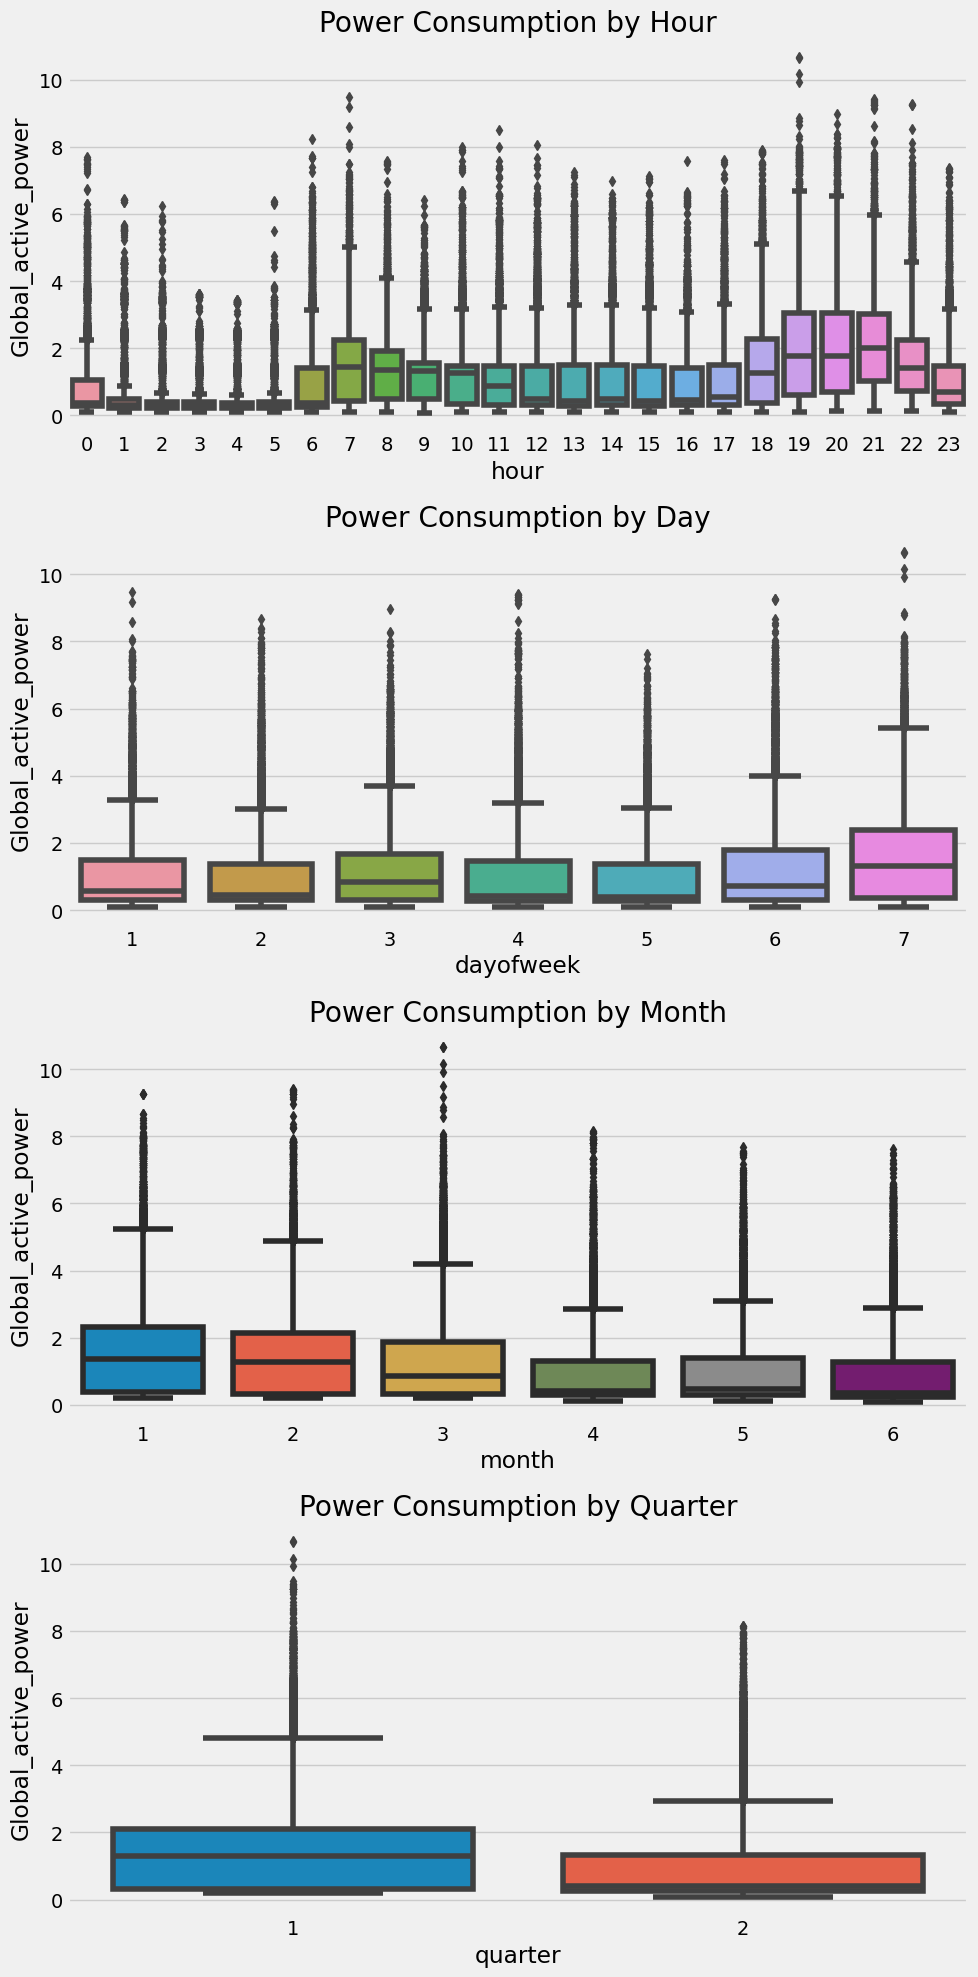

In [62]:
# Visualize the power consumption in various timeframes.

fig, axs = plt.subplots(4, 1, figsize=(10, 20))

# Consumption by Hour
sns.boxplot(data=df_ts, x='hour', y='Global_active_power', ax=axs[0])
axs[0].set_title('Power Consumption by Hour')

# Consumption by Day
sns.boxplot(data=df_ts, x='dayofweek', y='Global_active_power', ax=axs[1])
axs[1].set_title('Power Consumption by Day')

# Consumption by Month
sns.boxplot(data=df_ts, x='month', y='Global_active_power', ax=axs[2])
axs[2].set_title('Power Consumption by Month')

# Consumption by Quarter
sns.boxplot(data=df_ts, x='quarter', y='Global_active_power', ax=axs[3])
axs[3].set_title('Power Consumption by Quarter')

plt.tight_layout()
plt.show()

In [63]:
df.head()

,Global_active_power,Date_time,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date_time,,,,,
2007-01-01 00:00:00,2.580,2007-01-01 00:00:00,0.0,0.0,0.0
2007-01-01 00:01:00,2.552,2007-01-01 00:01:00,0.0,0.0,0.0
2007-01-01 00:02:00,2.550,2007-01-01 00:02:00,0.0,0.0,0.0
2007-01-01 00:03:00,2.550,2007-01-01 00:03:00,0.0,0.0,0.0
2007-01-01 00:04:00,2.554,2007-01-01 00:04:00,0.0,0.0,0.0


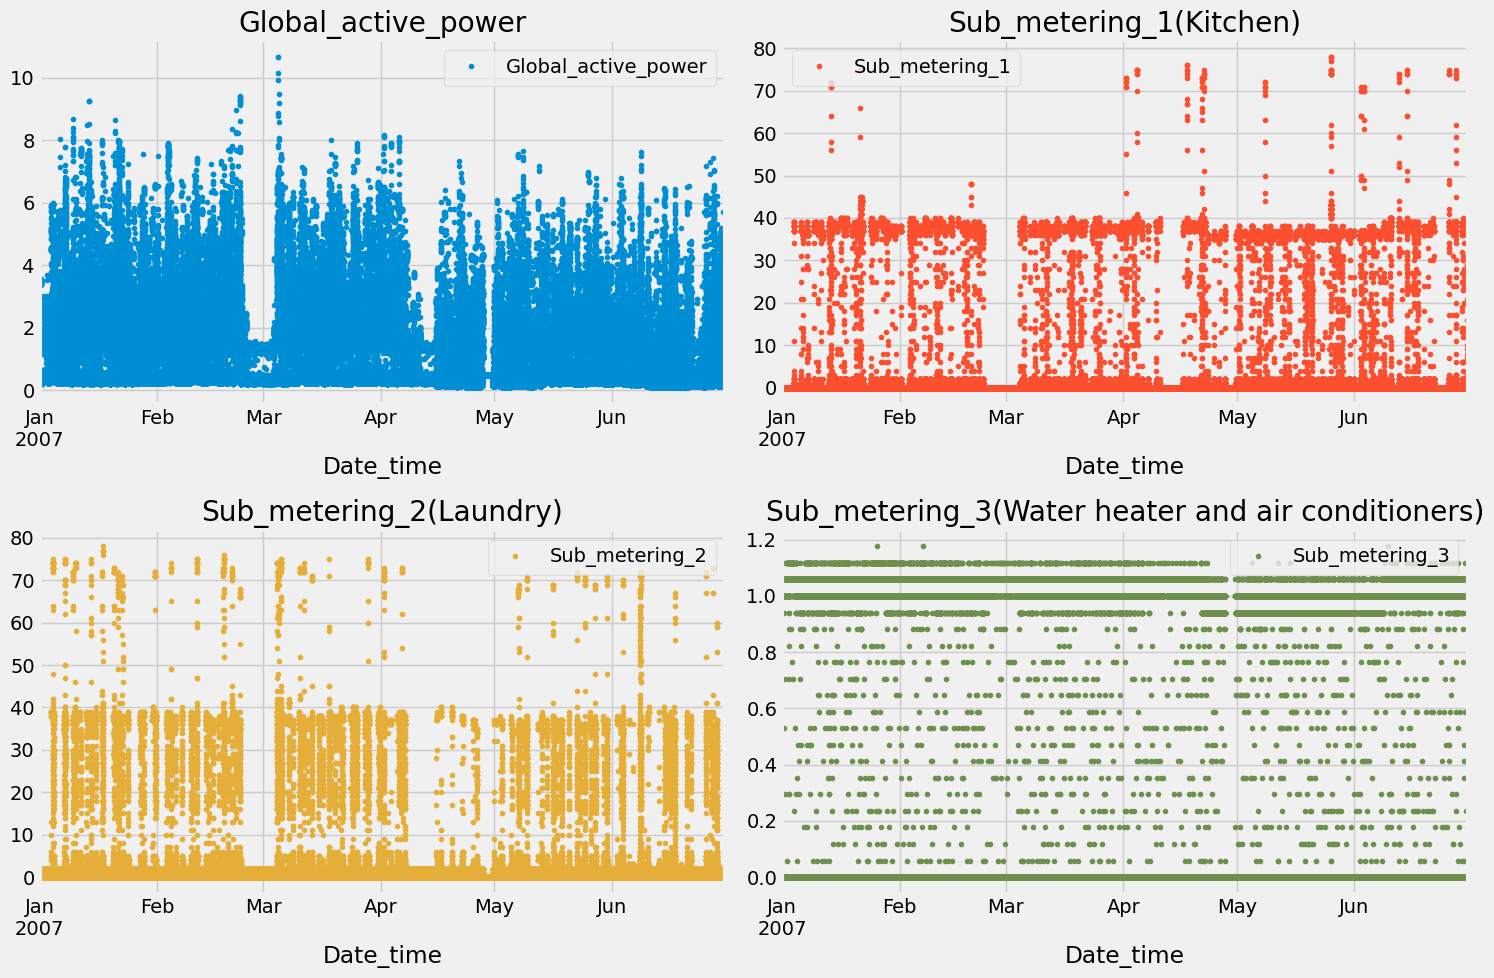

In [64]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

df.plot(x='Date_time', y='Global_active_power',style='.',color=color_pal[0], ax=axes[0,0], title='Global_active_power')
df.plot(x='Date_time', y='Sub_metering_1',style='.',color=color_pal[1], ax=axes[0,1], title='Sub_metering_1(Kitchen)')
df.plot(x='Date_time', y='Sub_metering_2',style='.',color=color_pal[2], ax=axes[1,0], title='Sub_metering_2(Laundry)')
df.plot(x='Date_time', y='Sub_metering_3',style='.',color=color_pal[3], ax=axes[1,1], title='Sub_metering_3(Water heater and air conditioners)')

plt.tight_layout()
plt.show()

In [65]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df_ts, test_size=0.2, random_state=42, stratify=df_ts['month'])

# Check the distribution in train and test sets
print("Training set:")
print(train_df['month'].value_counts(normalize=True))
print("\nTesting set:")
print(test_df['month'].value_counts(normalize=True))

Training set:
5    0.171271
3    0.171271
1    0.171271
4    0.165746
6    0.165746
2    0.154696
Name: month, dtype: float64

Testing set:
5    0.171271
3    0.171271
1    0.171271
4    0.165746
6    0.165746
2    0.154696
Name: month, dtype: float64


In [66]:
train_df_sorted = train_df.sort_values(by=['month', 'day', 'hour', 'minute'])
test_df_sorted = test_df.sort_values(by=['month', 'day', 'hour', 'minute'])

In [67]:
train_df_sorted.head()

,Global_active_power,Date_time,Sub_metering_1,Sub_metering_2,Sub_metering_3,hour,day,dayofweek,quarter,month,minute
Date_time,,,,,,,,,,,
2007-01-01 00:00:00,2.580,2007-01-01 00:00:00,0.0,0.0,0.0,0,1,1,1,1,0
2007-01-01 00:01:00,2.552,2007-01-01 00:01:00,0.0,0.0,0.0,0,1,1,1,1,1
2007-01-01 00:03:00,2.550,2007-01-01 00:03:00,0.0,0.0,0.0,0,1,1,1,1,3
2007-01-01 00:04:00,2.554,2007-01-01 00:04:00,0.0,0.0,0.0,0,1,1,1,1,4
2007-01-01 00:05:00,2.550,2007-01-01 00:05:00,0.0,0.0,0.0,0,1,1,1,1,5


In [68]:
train_df_sorted.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 208512 entries, 2007-01-01 00:00:00 to 2007-06-30 23:59:00
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Global_active_power  208512 non-null  float64       
 1   Date_time            208512 non-null  datetime64[ns]
 2   Sub_metering_1       208512 non-null  float64       
 3   Sub_metering_2       208512 non-null  float64       
 4   Sub_metering_3       208512 non-null  float64       
 5   hour                 208512 non-null  int64         
 6   day                  208512 non-null  int64         
 7   dayofweek            208512 non-null  int64         
 8   quarter              208512 non-null  int64         
 9   month                208512 non-null  int64         
 10  minute               208512 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(6)
memory usage: 19.1 MB


In [69]:
test_df_sorted.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52128 entries, 2007-01-01 00:02:00 to 2007-06-30 23:52:00
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Global_active_power  52128 non-null  float64       
 1   Date_time            52128 non-null  datetime64[ns]
 2   Sub_metering_1       52128 non-null  float64       
 3   Sub_metering_2       52128 non-null  float64       
 4   Sub_metering_3       52128 non-null  float64       
 5   hour                 52128 non-null  int64         
 6   day                  52128 non-null  int64         
 7   dayofweek            52128 non-null  int64         
 8   quarter              52128 non-null  int64         
 9   month                52128 non-null  int64         
 10  minute               52128 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(6)
memory usage: 4.8 MB


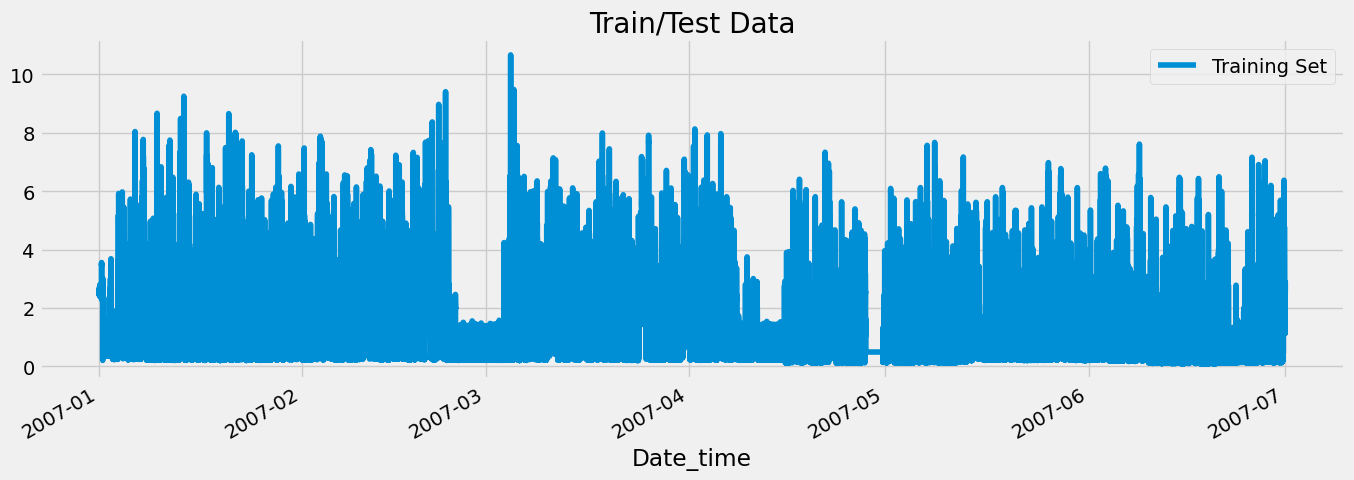

In [70]:
fig, ax = plt.subplots(figsize=(15, 5))
train_df_sorted.plot(x='Date_time', y='Global_active_power', ax=ax, label='Training Set', title='Train/Test Data')
plt.show()

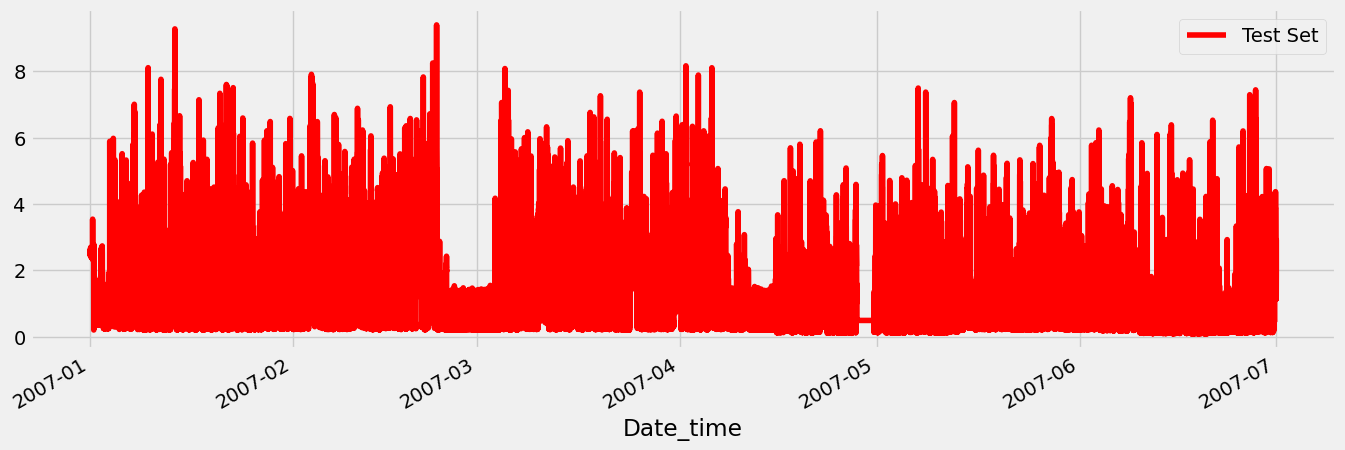

In [71]:
fig, ax = plt.subplots(figsize=(15, 5))
test_df_sorted.plot(x='Date_time', y='Global_active_power', ax=ax, label='Test Set', color='red')
plt.show()

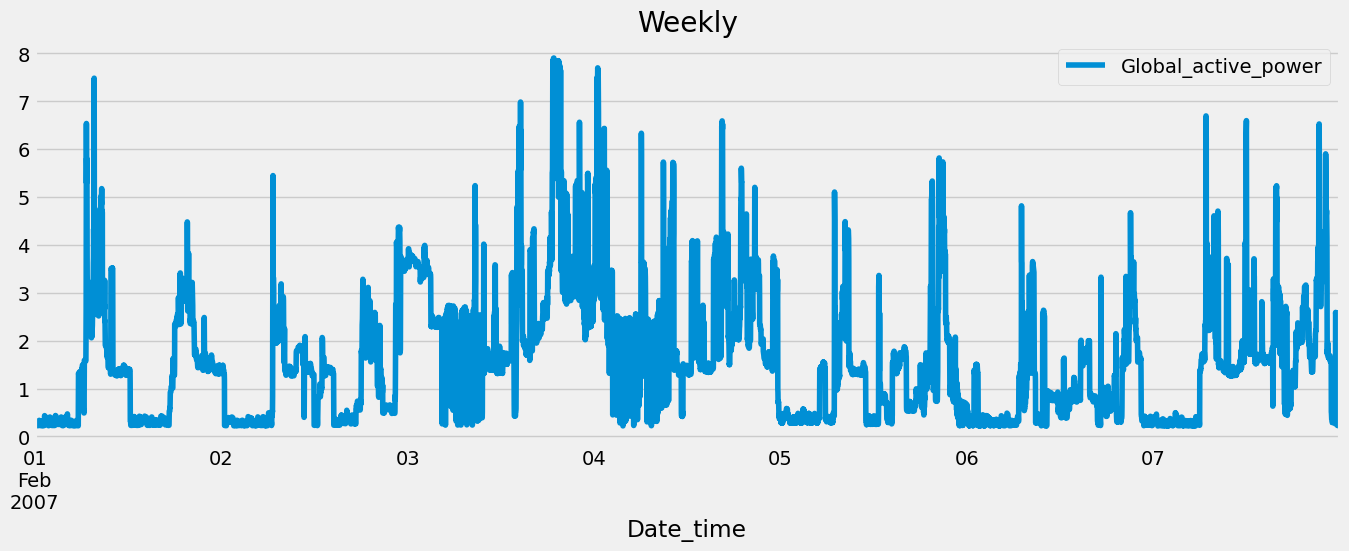

In [72]:
df.loc[(df.index >= '2007-02-01') & (df.index < '2007-02-08')].plot(x='Date_time', y='Global_active_power', figsize=(15, 5), title='Weekly')
plt.show()

In [73]:
features = ['Sub_metering_1', 'Sub_metering_2','Sub_metering_3','day', 'month', 'hour', 'minute']
target = 'Global_active_power'

X_train = train_df_sorted[features]
y_train = train_df_sorted[target]

X_test = test_df_sorted[features]
y_test = test_df_sorted[target]

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

In [74]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

poly_reg = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_reg.fit(X_train, y_train)

y_pred_poly_val = poly_reg.predict(X_val)
rmse_poly_val = mean_squared_error(y_val, y_pred_poly_val, squared=False)
print(f'Validation RMSE for Polynomial Regression: {rmse_poly_val}')

y_pred_poly = poly_reg.predict(X_test)
rmse_poly = mean_squared_error(y_test, y_pred_poly, squared=False)
print(f'Test RMSE for Polynomial Regression: {rmse_poly}')

Validation RMSE for Polynomial Regression: 0.6041765762023976
Test RMSE for Polynomial Regression: 0.6025073805421736


In [75]:
import xgboost as xgb

xg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',
                       n_estimators=3000,
                       objective='reg:squarederror',
                       max_depth=3,
                       learning_rate=0.003,
                       random_state=42)

xg.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=90, verbose=500)

y_pred_xgb = xg.predict(X_test)

rmse = mean_squared_error(y_test, y_pred_xgb, squared=False)
print(f'Test RMSE: {rmse}')

[0]	validation_0-rmse:1.34566
[500]	validation_0-rmse:0.70045
[1000]	validation_0-rmse:0.60424
[1500]	validation_0-rmse:0.57989
[2000]	validation_0-rmse:0.56632
[2500]	validation_0-rmse:0.55622
[2999]	validation_0-rmse:0.55102
Test RMSE: 0.5497045918733807


In [76]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf_val = rf.predict(X_val)
rmse_rf_val = mean_squared_error(y_val, y_pred_rf_val, squared=False)
print(f'Validation RMSE for Random Forest: {rmse_rf_val}')

y_pred_rf = rf.predict(X_test)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
print(f'Test RMSE for Random Forest: {rmse_rf}')

Validation RMSE for Random Forest: 0.26557895109140883
Test RMSE for Random Forest: 0.267472870505187


In [77]:
from sklearn.metrics import mean_absolute_error

metrics_dict = {'Model': [], 'RMSE': [], 'MSE': [], 'MAE': []}
models = [poly_reg, xg, rf]
model_names = ['Polynomial Regression', 'XGBoost', 'Random Forest', 'CatBoost']

for model, name in zip(models, model_names):
    y_pred = model.predict(X_test)

    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    metrics_dict['Model'].append(name)
    metrics_dict['RMSE'].append(rmse)
    metrics_dict['MSE'].append(mse)
    metrics_dict['MAE'].append(mae)

metrics_df = pd.DataFrame(metrics_dict)
metrics_df.style.format({'RMSE': '{:.3f}', 'MSE': '{:.3f}', 'MAE': '{:.3f}'}).highlight_min(color='lightblue', subset=['RMSE','MSE','MAE'])

,Model,RMSE,MSE,MAE
0,Polynomial Regression,0.603,0.363,0.394
1,XGBoost,0.550,0.302,0.351
2,Random Forest,0.267,0.072,0.105


In [78]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [5, 7, 9],
    'subsample': [0.5, 0.7, 1],
    'colsample_bytree': [0.5, 0.7, 1],
}

grid_search = GridSearchCV(estimator=xgb.XGBRegressor(objective='reg:squarederror'),
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error',
                           n_jobs=-1)  # use all available cores if you have a multi-core processor

grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(best_params)

# Re-train the model using the best parameters
xg = xgb.XGBRegressor(**best_params)
xg.fit(X_train, y_train)

{'colsample_bytree': 1, 'max_depth': 9, 'subsample': 1}


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=9,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, random_state=None, ...)

Feature: Sub_metering_1, Score: 0.16276
Feature: Sub_metering_2, Score: 0.14844
Feature: Sub_metering_3, Score: 0.39269
Feature: day, Score: 0.09466
Feature: month, Score: 0.07048
Feature: hour, Score: 0.08163
Feature: minute, Score: 0.04935


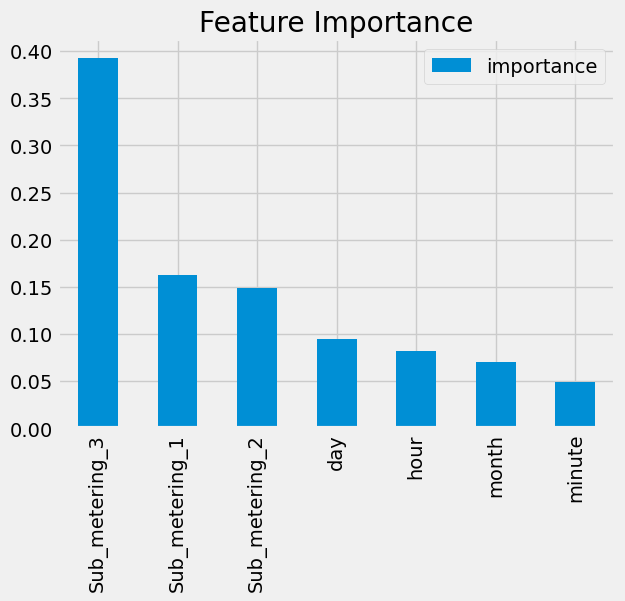

In [79]:
# Result
importance = rf.feature_importances_
for i, j in enumerate(importance):
    print(f'Feature: {rf.feature_names_in_[i]}, Score: {j:.5f}')

# Plot
fi = pd.DataFrame(data=rf.feature_importances_,
             index=rf.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance', ascending=False).plot(kind='bar', title='Feature Importance')
plt.show()

In [80]:
# RMSE Score
test_df_sorted['Prediction'] = rf.predict(X_test)
score = mean_squared_error(test_df_sorted['Global_active_power'], test_df_sorted['Prediction'], squared=False)
print(f'RMSE Score on Test set: {score:0.3f}')

RMSE Score on Test set: 0.267


In [81]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52128 entries, 2007-01-01 00:02:00 to 2007-06-30 23:52:00
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sub_metering_1  52128 non-null  float64
 1   Sub_metering_2  52128 non-null  float64
 2   Sub_metering_3  52128 non-null  float64
 3   day             52128 non-null  int64  
 4   month           52128 non-null  int64  
 5   hour            52128 non-null  int64  
 6   minute          52128 non-null  int64  
dtypes: float64(3), int64(4)
memory usage: 3.2 MB


In [82]:
X_test.shape

(52128, 7)

In [83]:
test_df_sorted['Error'] = np.abs(test_df_sorted[target] - test_df_sorted['Prediction'])
test_df_sorted['Date'] = test_df_sorted.index.date
test_df_sorted.groupby(['Date'])['Error'].mean().sort_values(ascending=False).head(10)

Date
2007-01-21    0.500908
2007-01-28    0.489883
2007-01-14    0.456155
2007-02-11    0.404490
2007-01-20    0.403357
2007-01-24    0.395137
2007-02-04    0.362626
2007-05-06    0.293565
2007-02-18    0.271429
2007-01-23    0.253812
Name: Error, dtype: float64

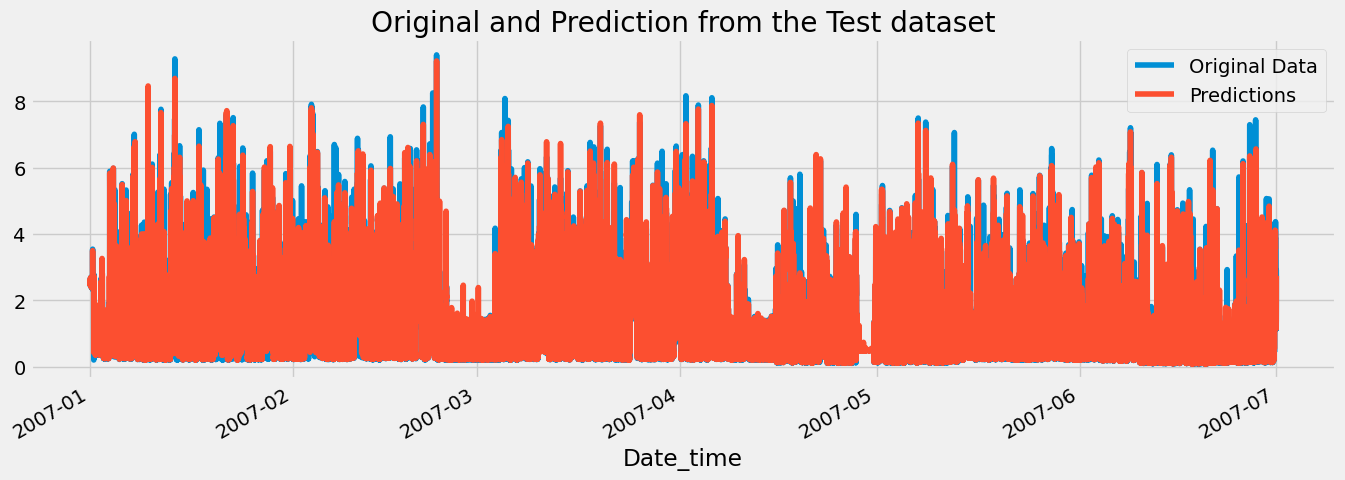

In [84]:
#df = df.merge(test_df_sorted['Prediction'], how='left', left_index=True, right_index=True)
ax = test_df_sorted[['Global_active_power']].plot(figsize=(15, 5))
test_df_sorted['Prediction'].plot(ax=ax, style='')
plt.legend(['Original Data', 'Predictions'])
ax.set_title('Original and Prediction from the Test dataset')
plt.show()

In [85]:
rf.predict(((0,1,17,10,1,10,1),))

array([1.47474])

In [86]:
from joblib import dump

In [88]:
dump(rf, './../savedmodels/model.joblib')

['./../savedmodels/model.joblib']